# Case Study - Analyse the data of quarterly shipments transfer of a certain courier company in the $20^{th}$ century.

#### Basic Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Read the data in a quarterly Time Series Format.

In [51]:
df=pd.read_csv('ApplianceShipments.csv',parse_dates=['Year'],index_col=['Year'])
df

,Quarter,Shipments
Year,,
1985-01-01,Q1,4009
1985-01-01,Q2,4321
1985-01-01,Q3,4224
1985-01-01,Q4,3944
1986-01-01,Q1,4123
1986-01-01,Q2,4522
1986-01-01,Q3,4657
1986-01-01,Q4,4030
1987-01-01,Q1,4493


## 2. Plot the Time Series data.

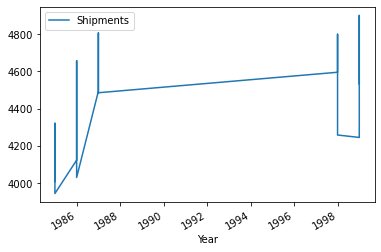

In [5]:
df.plot()
plt.show()

## Find the basic measures of descriptive statistics for this time series across quarters of different years.

In [10]:
df.groupby('Year')['Shipments'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1985-01-01,4.0,4124.50,177.419465,3944.0,3992.75,4116.5,4248.25,4321.0
1986-01-01,4.0,4333.00,303.647822,4030.0,4099.75,4322.5,4555.75,4657.0
1987-01-01,4.0,4583.75,151.057108,4485.0,4491.00,4522.0,4614.75,4806.0
1998-01-01,4.0,4517.25,232.872462,4258.0,4377.25,4506.0,4646.00,4799.0
1999-01-01,4.0,4565.75,268.357194,4245.0,4461.00,4559.0,4663.75,4900.0


## 3. Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

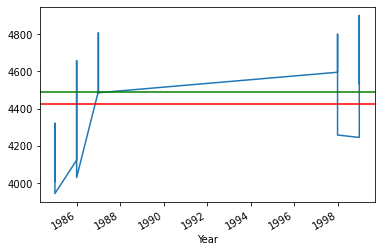

In [22]:
df['Shipments'].plot()
plt.axhline(df['Shipments'].mean(),color='red')
plt.axhline(df['Shipments'].median(),color='g')
plt.show()

In [110]:
df1 = df1.resample('Y').interpolate(method='spline',order=2)
df1

,Shipments
Year,
1985-12-31,4124.500000
1986-12-31,4333.000000
1987-12-31,4583.750000
1988-12-31,4577.704545
1989-12-31,4571.659091
1990-12-31,4565.613636
1991-12-31,4559.568182
1992-12-31,4553.522727
1993-12-31,4547.477273


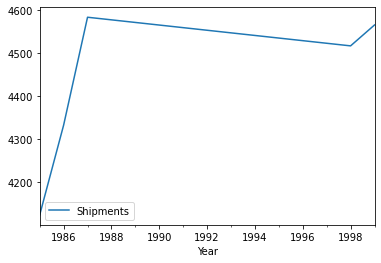

In [111]:
df1.plot()
plt.show()

## 4. Plot a quarterly comparison of the shipments using a barplot.

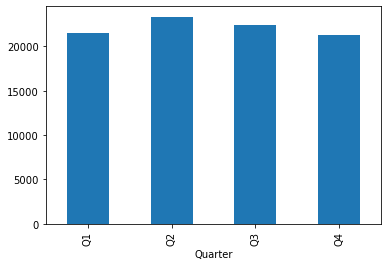

In [72]:
df.groupby('Quarter')['Shipments'].sum().plot(kind='bar')
plt.show()

## 5. Plot the year on year quarterly comparison of the shipments.

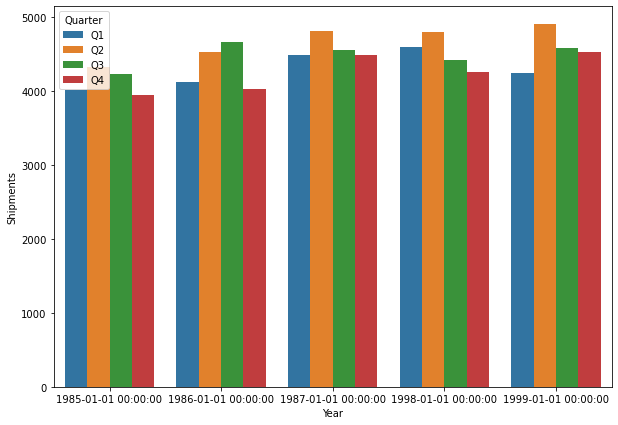

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.index,y=df['Shipments'],hue=df['Quarter'])
plt.show()

## 6. Plot the distribution plot for quarterly comparison of the shipments.

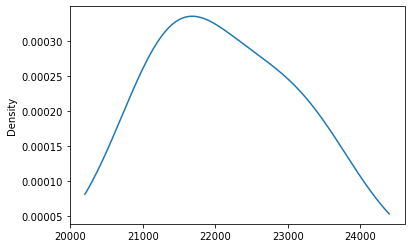

In [43]:
df.groupby('Quarter')['Shipments'].sum().plot(kind='kde')
plt.show()

## 7. Decompose the data and check the trend, seasonality and the irregular/residual/error component.

In [96]:
decomp=seasonal_decompose(df1,model='additive')

In [83]:
decomp.trend

Year
1985-03-31            NaN
1985-06-30            NaN
1985-09-30            NaN
1985-12-31            NaN
1986-03-31            NaN
1986-06-30            NaN
1986-09-30    4422.617424
1986-12-31    4458.149621
1987-03-31    4489.212121
1987-06-30    4515.804924
1987-09-30    4537.928030
1987-12-31    4555.141335
1988-03-31    4567.004735
1988-06-30    4573.518229
1988-09-30    4574.681818
1988-12-31    4573.170455
1989-03-31    4571.659091
1989-06-30    4570.147727
1989-09-30    4568.636364
1989-12-31    4567.125000
1990-03-31    4565.613636
1990-06-30    4564.102273
1990-09-30    4562.590909
1990-12-31    4561.079545
1991-03-31    4559.568182
1991-06-30    4558.056818
1991-09-30    4556.545455
1991-12-31    4555.034091
1992-03-31    4553.522727
1992-06-30    4552.011364
1992-09-30    4550.500000
1992-12-31    4548.988636
1993-03-31    4547.477273
1993-06-30    4545.965909
1993-09-30    4544.454545
1993-12-31    4542.943182
1994-03-31    4541.431818
1994-06-30    4539.920455
1994-09

In [84]:
decomp.seasonal

Year
1985-03-31    -4.619170
1985-06-30    -7.335612
1985-09-30    -8.998668
1985-12-31    -6.725941
1986-03-31    -6.725941
1986-06-30    -6.725941
1986-09-30     2.213453
1986-12-31     9.002279
1987-03-31    16.908529
1987-06-30     9.882487
1987-09-30     3.973870
1987-12-31    -0.849343
1988-03-31    -4.619170
1988-06-30    -7.335612
1988-09-30    -8.998668
1988-12-31    -6.725941
1989-03-31    -6.725941
1989-06-30    -6.725941
1989-09-30     2.213453
1989-12-31     9.002279
1990-03-31    16.908529
1990-06-30     9.882487
1990-09-30     3.973870
1990-12-31    -0.849343
1991-03-31    -4.619170
1991-06-30    -7.335612
1991-09-30    -8.998668
1991-12-31    -6.725941
1992-03-31    -6.725941
1992-06-30    -6.725941
1992-09-30     2.213453
1992-12-31     9.002279
1993-03-31    16.908529
1993-06-30     9.882487
1993-09-30     3.973870
1993-12-31    -0.849343
1994-03-31    -4.619170
1994-06-30    -7.335612
1994-09-30    -8.998668
1994-12-31    -6.725941
1995-03-31    -6.725941
1995-06-30 

In [85]:
decomp.resid

Year
1985-03-31          NaN
1985-06-30          NaN
1985-09-30          NaN
1985-12-31          NaN
1986-03-31          NaN
1986-06-30          NaN
1986-09-30    33.544123
1986-12-31    53.910600
1987-03-31    77.629350
1987-06-30    56.551225
1987-09-30    38.825373
1987-12-31    24.923917
1988-03-31    15.318981
1988-06-30    10.010565
1988-09-30     8.998668
1988-12-31     6.725941
1989-03-31     6.725941
1989-06-30     6.725941
1989-09-30    -2.213453
1989-12-31    -9.002279
1990-03-31   -16.908529
1990-06-30    -9.882487
1990-09-30    -3.973870
1990-12-31     0.849343
1991-03-31     4.619170
1991-06-30     7.335612
1991-09-30     8.998668
1991-12-31     6.725941
1992-03-31     6.725941
1992-06-30     6.725941
1992-09-30    -2.213453
1992-12-31    -9.002279
1993-03-31   -16.908529
1993-06-30    -9.882487
1993-09-30    -3.973870
1993-12-31     0.849343
1994-03-31     4.619170
1994-06-30     7.335612
1994-09-30     8.998668
1994-12-31     6.725941
1995-03-31     6.725941
1995-06-30 

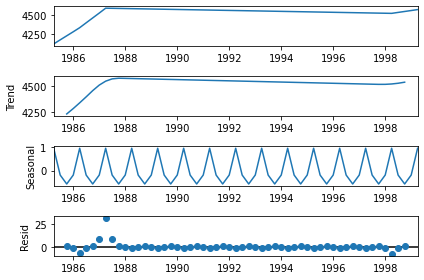

In [97]:
decomp.plot()
plt.show()

In [87]:
decomp=seasonal_decompose(df1,model='multipicative')

In [88]:
decomp.trend

Year
1985-03-31            NaN
1985-06-30            NaN
1985-09-30    4228.750000
1985-12-31    4282.195312
1986-03-31    4338.281250
1986-06-30    4397.007812
1986-09-30    4458.375000
1986-12-31    4513.037642
1987-03-31    4551.650568
1987-06-30    4574.213778
1987-09-30    4580.727273
1987-12-31    4579.215909
1988-03-31    4577.704545
1988-06-30    4576.193182
1988-09-30    4574.681818
1988-12-31    4573.170455
1989-03-31    4571.659091
1989-06-30    4570.147727
1989-09-30    4568.636364
1989-12-31    4567.125000
1990-03-31    4565.613636
1990-06-30    4564.102273
1990-09-30    4562.590909
1990-12-31    4561.079545
1991-03-31    4559.568182
1991-06-30    4558.056818
1991-09-30    4556.545455
1991-12-31    4555.034091
1992-03-31    4553.522727
1992-06-30    4552.011364
1992-09-30    4550.500000
1992-12-31    4548.988636
1993-03-31    4547.477273
1993-06-30    4545.965909
1993-09-30    4544.454545
1993-12-31    4542.943182
1994-03-31    4541.431818
1994-06-30    4539.920455
1994-09

In [89]:
decomp.seasonal

Year
1985-03-31    1.000208
1985-06-30    0.999958
1985-09-30    0.999875
1985-12-31    0.999959
1986-03-31    1.000208
1986-06-30    0.999958
1986-09-30    0.999875
1986-12-31    0.999959
1987-03-31    1.000208
1987-06-30    0.999958
1987-09-30    0.999875
1987-12-31    0.999959
1988-03-31    1.000208
1988-06-30    0.999958
1988-09-30    0.999875
1988-12-31    0.999959
1989-03-31    1.000208
1989-06-30    0.999958
1989-09-30    0.999875
1989-12-31    0.999959
1990-03-31    1.000208
1990-06-30    0.999958
1990-09-30    0.999875
1990-12-31    0.999959
1991-03-31    1.000208
1991-06-30    0.999958
1991-09-30    0.999875
1991-12-31    0.999959
1992-03-31    1.000208
1992-06-30    0.999958
1992-09-30    0.999875
1992-12-31    0.999959
1993-03-31    1.000208
1993-06-30    0.999958
1993-09-30    0.999875
1993-12-31    0.999959
1994-03-31    1.000208
1994-06-30    0.999958
1994-09-30    0.999875
1994-12-31    0.999959
1995-03-31    1.000208
1995-06-30    0.999958
1995-09-30    0.999875
1995-1

In [90]:
decomp.resid

Year
1985-03-31         NaN
1985-06-30         NaN
1985-09-30    1.000125
1985-12-31    0.999733
1986-03-31    0.998575
1986-06-30    0.999742
1986-09-30    1.000125
1986-12-31    1.001819
1987-03-31    1.006843
1987-06-30    1.001796
1987-09-30    1.000125
1987-12-31    1.000041
1988-03-31    0.999792
1988-06-30    1.000042
1988-09-30    1.000125
1988-12-31    1.000041
1989-03-31    0.999792
1989-06-30    1.000042
1989-09-30    1.000125
1989-12-31    1.000041
1990-03-31    0.999792
1990-06-30    1.000042
1990-09-30    1.000125
1990-12-31    1.000041
1991-03-31    0.999792
1991-06-30    1.000042
1991-09-30    1.000125
1991-12-31    1.000041
1992-03-31    0.999792
1992-06-30    1.000042
1992-09-30    1.000125
1992-12-31    1.000041
1993-03-31    0.999792
1993-06-30    1.000042
1993-09-30    1.000125
1993-12-31    1.000041
1994-03-31    0.999792
1994-06-30    1.000042
1994-09-30    1.000125
1994-12-31    1.000041
1995-03-31    0.999792
1995-06-30    1.000042
1995-09-30    1.000125
1995-1

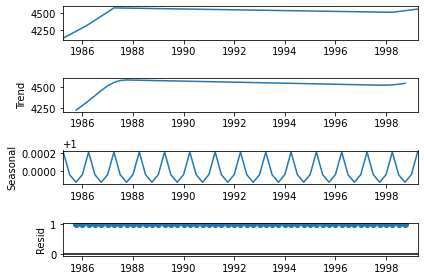

In [91]:
decomp.plot()
plt.show()

Go ahead and play around with the data to understand the nuances. Try to perform different types of visualizations in order for better understanding of the data. 

Happy Learning!

# END